
# Baseline

### Import the necessary libraries

In [2]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import mimetypes
import seaborn as sns 

# Sklearn libraries
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, auc
from sklearn.base import BaseEstimator, TransformerMixin # to create classes
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.impute import (SimpleImputer)
from sklearn.preprocessing import (OneHotEncoder, OrdinalEncoder, StandardScaler)
from matplotlib.colors import ListedColormap
from matplotlib import transforms
import zlib, json, base64
import requests
import datetime
import matplotlib.ticker as mtick


#### Import the dataset

In [3]:
df_test = pd.read_csv('data/test.csv')

In [5]:
df_test.dtypes

Type                             object
Date                             object
Part of a policing operation     object
Latitude                        float64
Longitude                       float64
Gender                           object
Age range                        object
Officer-defined ethnicity        object
Legislation                      object
Object of search                 object
station                          object
predicted_class                   int64
true_class                        int64
dtype: object

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Type                          4000 non-null   object 
 1   Date                          4000 non-null   object 
 2   Part of a policing operation  2691 non-null   object 
 3   Latitude                      2829 non-null   float64
 4   Longitude                     2829 non-null   float64
 5   Gender                        4000 non-null   object 
 6   Age range                     4000 non-null   object 
 7   Officer-defined ethnicity     4000 non-null   object 
 8   Legislation                   4000 non-null   object 
 9   Object of search              4000 non-null   object 
 10  station                       4000 non-null   object 
 11  predicted_class               4000 non-null   int64  
 12  true_class                    4000 non-null   int64  
dtypes: 

### EDA (Exploratory Dataset Analysis)

In [7]:
df_test.nunique()

Type                               2
Date                            3451
Part of a policing operation       2
Latitude                        1556
Longitude                       1558
Gender                             3
Age range                          5
Officer-defined ethnicity          5
Legislation                        7
Object of search                  10
station                            6
predicted_class                    2
true_class                         2
dtype: int64

In [11]:
attributes = ['Type',
              'Part of a policing operation',
              'Gender', 
              'Age range', 
              'Officer-defined ethnicity', 
              'Legislation', 
              'Object of search', 
              'station']

for col in attributes:
    print(df_test[col].unique())

['Person search' 'Person and Vehicle search']
[False nan True]
['Male' 'Female' 'Other']
['18-24' '10-17' 'over 34' '25-34' 'under 10']
['Black' 'Asian' 'White' 'Other' 'Mixed']
['Criminal Justice Act 1988 (section 139B)'
 'Misuse of Drugs Act 1971 (section 23)'
 'Police and Criminal Evidence Act 1984 (section 1)'
 'Criminal Justice and Public Order Act 1994 (section 60)'
 'Firearms Act 1968 (section 47)'
 'Psychoactive Substances Act 2016 (s36(2))'
 'Poaching Prevention Act 1862 (section 2)']
['Offensive weapons' 'Controlled drugs' 'Article for use in theft'
 'Stolen goods' 'Firearms' 'Articles for use in criminal damage'
 'Fireworks' 'Psychoactive substances' 'Game or poaching equipment'
 'Evidence of offences under the Act']
['nottinghamshire' 'cambridgeshire' 'city-of-london' 'devon-and-cornwall'
 'durham' 'bedfordshire']


In [12]:
df_test.isna().sum()

Type                               0
Date                               0
Part of a policing operation    1309
Latitude                        1171
Longitude                       1171
Gender                             0
Age range                          0
Officer-defined ethnicity          0
Legislation                        0
Object of search                   0
station                            0
predicted_class                    0
true_class                         0
dtype: int64

In [13]:
df_test['Date'].min()

'2022-01-01T00:35:00+00:00'

In [15]:
df_test['Date'].max()

'2022-03-14T14:45:00+00:00'

#### Convert Data Types

In [16]:
# Convert Column Date to Datetime
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test = df_test.sort_values('Date')

In [18]:
# Linked_search should be considered to False
# It was found that officers tend to forget to fill in a None when they don’t find anything. 

df_test[['Part of a policing operation']] = df_test[['Part of a policing operation']].fillna(False).astype('boolean')

In [19]:
# Convert Columns with Category Values
cat = ['Type', 
       'Part of a policing operation',
       'Gender',
       'Age range', 
       'Officer-defined ethnicity', 
       'Legislation', 
       'Object of search',
       'station']

df_test[cat] = df_test[cat].astype('category')

### EDA

In [20]:
df_test.isna().sum()

Type                               0
Date                               0
Part of a policing operation       0
Latitude                        1171
Longitude                       1171
Gender                             0
Age range                          0
Officer-defined ethnicity          0
Legislation                        0
Object of search                   0
station                            0
predicted_class                    0
true_class                         0
dtype: int64

In [21]:
df_test.groupby(df_test.station)[['predicted_class', 'true_class']].value_counts().unstack()

true_class                            0    1
station            predicted_class          
bedfordshire       0                 12    3
                   1                641  171
cambridgeshire     0                 11    4
                   1                303  112
city-of-london     0                  0    0
                   1                367  106
devon-and-cornwall 0                 36    4
                   1                861  190
durham             0                  0    0
                   1                310  111
nottinghamshire    0                 15    1
                   1                570  172

In [23]:
data1 = np.random.random((4, 4))
cmap = plt.cm.Pastel2
my_cmap = cmap(np.arange(cmap.N))
my_cmap[:, -1] = np.linspace(0.5, 0.7, cmap.N)
my_cmap = ListedColormap(my_cmap)

In [24]:
data1 = np.random.random((4, 4))
cmap = plt.cm.Paired
gcmap = cmap(np.arange(cmap.N))
gcmap[:, -1] = np.linspace(0.6, 0.7, cmap.N)
gcmap = ListedColormap(gcmap)

In [26]:
color_list = ['#89C4C2','#D0EBC5', '#F3F7C1', '#F9D4A4', '#F5A2A2', '#BC789E']

#### Check Inbalanced Dataset

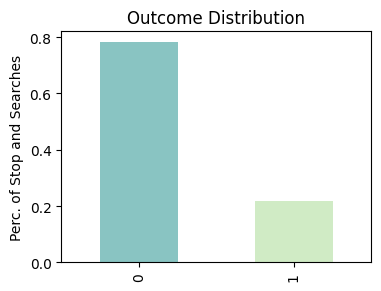

In [31]:
# Checking if the dataset is imbalanced 
df_test["true_class"].value_counts(normalize=True, dropna = False).plot(kind="bar", color = color_list, figsize=(4, 3))
plt.title("Outcome Distribution")
plt.ylabel("Perc. of Stop and Searches");